<a href="https://colab.research.google.com/github/gregumo1987/MLA_GGM/blob/main/MLA1_GGM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine Learning Assignment 1<br>
Greg Gutierrez<br>
CS430-ON<br>
Machine Learning in the Cloud**

Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Connecting to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/weather_2012.csv')

Code to display first five rows and a sample of five random rows

In [ ]:
df.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [7]:
df.sample(5)

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
701,2012-01-30 05:00:00,-7.9,-13.8,63,13,25.0,101.33,Clear
1011,2012-02-12 03:00:00,-16.8,-23.9,54,9,25.0,100.57,Mainly Clear
7041,2012-10-20 09:00:00,13.8,13.2,96,4,9.7,99.89,Fog
8751,2012-12-30 15:00:00,-11.3,-15.6,70,32,48.3,101.05,Mainly Clear
2664,2012-04-21 00:00:00,6.3,3.7,83,19,25.0,100.18,Cloudy


Code to display all columns in data set

In [8]:
df.columns.tolist()

['Date/Time',
 'Temp (C)',
 'Dew Point Temp (C)',
 'Rel Hum (%)',
 'Wind Spd (km/h)',
 'Visibility (km)',
 'Stn Press (kPa)',
 'Weather']

Code to rename Column names

In [9]:
df.rename(columns={ 'Date/Time': 'date_time','Temp (C)': 'temp_c','Dew Point Temp (C)':'dew_point','Rel Hum (%)': 'relative_humidity', 'Wind Spd (km/h)': 'wind_speed','Visibility (km)':'visibility','Stn Press (kPa)':'pressure'}, inplace=True)

Statistics for Each Column

In [10]:
df.describe()

,temp_c,dew_point,relative_humidity,wind_speed,visibility,pressure
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


Code to add column named temp_f that represents farenheit temperature

In [11]:
df=df.assign(temp_f = lambda x: x.temp_c*1.8+32)

In [12]:
df

,date_time,temp_c,dew_point,relative_humidity,wind_speed,visibility,pressure,Weather,temp_f
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,28.76
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,28.76
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",28.76
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",29.30
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,29.30
...,...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow,32.18
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow,32.36
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow,31.10
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow,31.64


In [ ]:
Code to rearrange columns in dataset for temp_f to come before temp_c

In [13]:
df=df[['date_time','temp_f', 'temp_c','dew_point','relative_humidity', 'wind_speed','visibility','pressure']]

Code to display data types

In [14]:
df.dtypes

date_time             object
temp_f               float64
temp_c               float64
dew_point            float64
relative_humidity      int64
wind_speed             int64
visibility           float64
pressure             float64
dtype: object

Code to convert date/time column to date data type

In [15]:
df.date_time=pd.to_datetime(df.date_time)

/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [16]:
df.dtypes

date_time            datetime64[ns]
temp_f                      float64
temp_c                      float64
dew_point                   float64
relative_humidity             int64
wind_speed                    int64
visibility                  float64
pressure                    float64
dtype: object

Average Temperature Series for each month

In [17]:
monthly_avg=df.groupby(pd.Grouper(key='date_time', freq='M')).mean()
monthly_avg=monthly_avg['temp_f']

In [18]:
monthly_avg

date_time
2012-01-31    18.731290
2012-02-29    24.395000
2012-03-31    37.618226
2012-04-30    44.616750
2012-05-31    61.227984
2012-06-30    68.241250
2012-07-31    73.022097
2012-08-31    72.102742
2012-09-30    61.672000
2012-10-31    51.718952
2012-11-30    33.676500
2012-12-31    26.048629
Freq: M, Name: temp_f, dtype: float64

In [19]:
monthly_avg.head()


date_time
2012-01-31    18.731290
2012-02-29    24.395000
2012-03-31    37.618226
2012-04-30    44.616750
2012-05-31    61.227984
Freq: M, Name: temp_f, dtype: float64

Scatterplot to compare the temperature against the relative humidity

<AxesSubplot:xlabel='temp_f', ylabel='relative_humidity'>

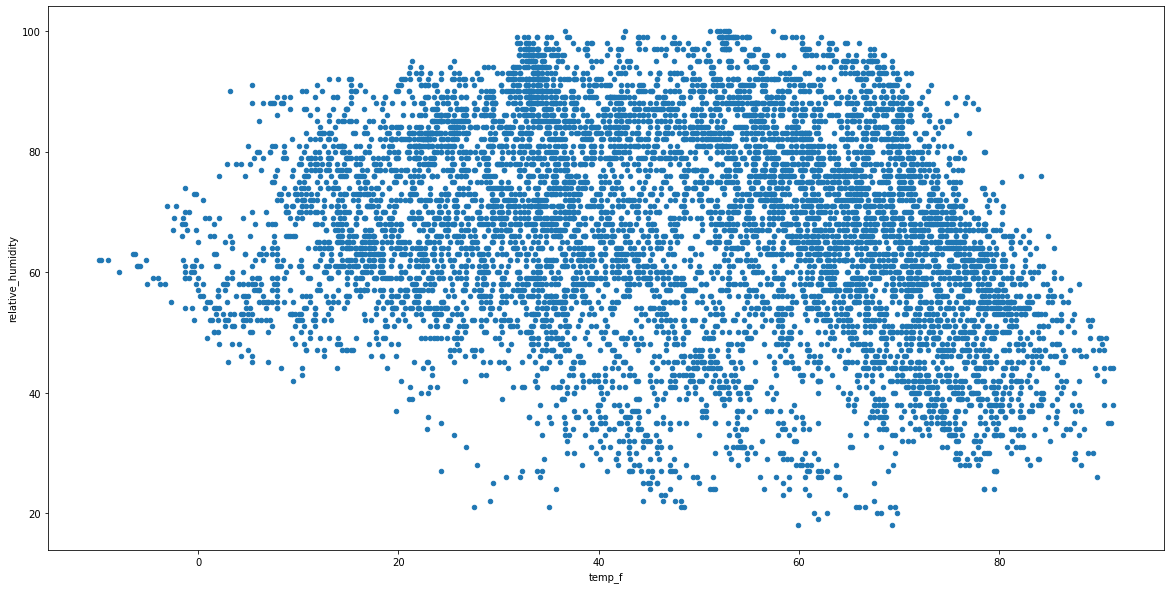

In [20]:
df.plot(kind='scatter', x='temp_f',y="relative_humidity", figsize=(20,10))

line chart that shows the average temperature per month

<AxesSubplot:xlabel='date_time'>

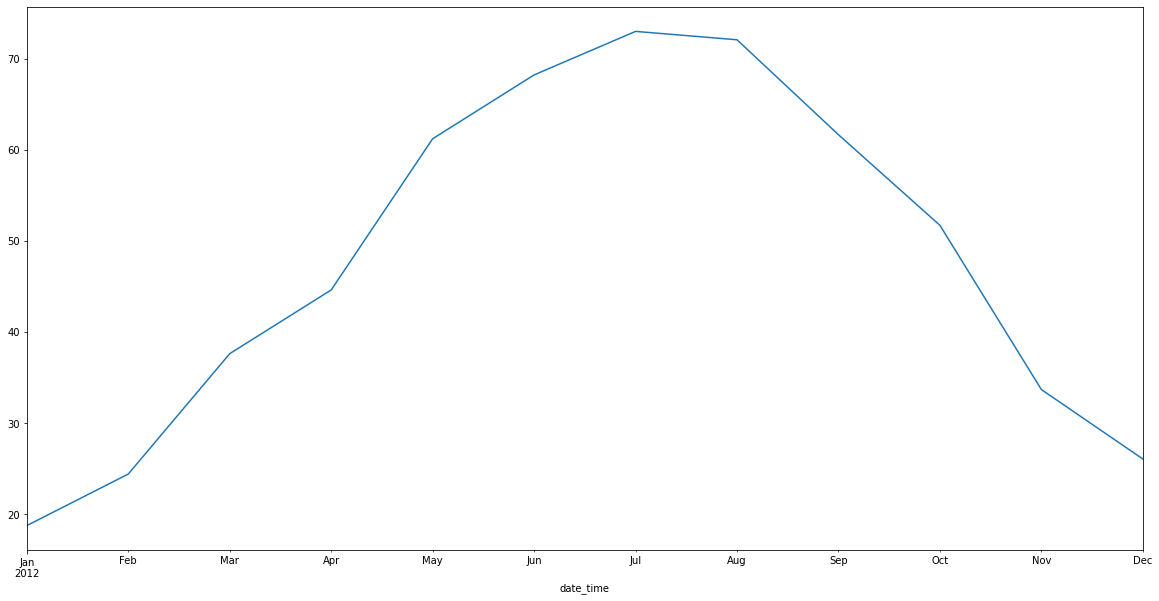

In [21]:
monthly_avg.plot(kind='line',x='date_time',y='temp_f',figsize=(20,10))

Box plot for dataframe

<AxesSubplot:>

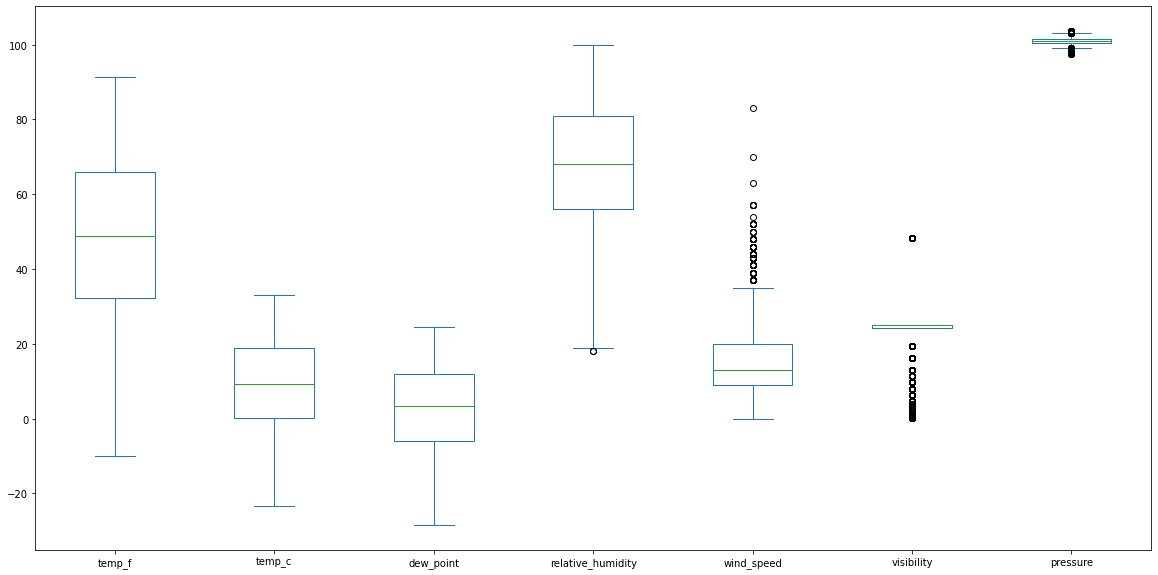

In [22]:
df.plot(kind='box',figsize=(20,10))